## Part 3 - Explainable AI - Visualisation


In [ ]:
from keras.applications.vgg16 import VGG16
from keras import backend as K
 
K.clear_session()
 
# Note that we are including the densely-connected classifier on top;
model = VGG16(weights='imagenet') 

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
 
# The local path to our target image
img_path = 'creative_commons_elephant.jpg'
 
# `img` is a PIL image of size 224x224
img = image.load_img(img_path, target_size=(224, 224))
 
# `x` is a float32 Numpy array of shape (224, 224, 3)
x = image.img_to_array(img)
 
# We add a dimension to transform our array into a "batch" of size (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)
 
# Finally we preprocess the batch (this does channel-wise color normalization)
x = preprocess_input(x)
img_tensor = x
 
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02504458', 'African_elephant', 0.90942055), ('n01871265', 'tusker', 0.086183496), ('n02504013', 'Indian_elephant', 0.0043545887)]


In [ ]:
np.argmax(preds[0])

386

In [ ]:
import tensorflow as tf
from keras import backend as K
from tensorflow.keras import models

conv_layer = model.get_layer("block5_conv3")
heatmap_model = models.Model([model.inputs], [conv_layer.output, model.output])

# Get gradient
with tf.GradientTape() as gtape:
    conv_output, predictions = heatmap_model(img_tensor)
    loss = predictions[:, np.argmax(predictions[0])]
    grads = gtape.gradient(loss, conv_output)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
heatmap = np.maximum(heatmap, 0)
max_heat = np.max(heatmap)
if max_heat == 0:
    max_heat = 1e-10
heatmap /= max_heat

print(heatmap.shape)

(1, 14, 14)


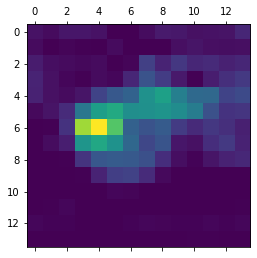

In [ ]:
import matplotlib.pyplot as plt

heatmap=np.squeeze(heatmap)
plt.matshow(heatmap)
plt.show()

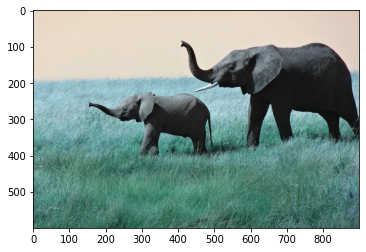

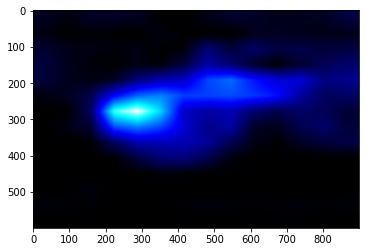

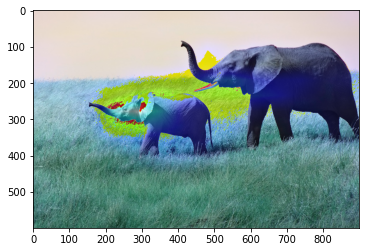

In [ ]:
import cv2

# We use cv2 to load the original image
img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_HOT)
plt.imshow(heatmap)
plt.show()

# 0.4 here is a heatmap intensity factor
superimposed_img = heatmap * 0.4 + img
superimposed_img = superimposed_img.astype('uint8')
 
# Save the image to disk
cv2.imwrite('elephant_cam.jpg', superimposed_img)

plt.imshow(superimposed_img)
plt.show()

### Other image

In [ ]:
img_path = 'corgi.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
img_tensor = x
 
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02113023', 'Pembroke', 0.8048655), ('n02113186', 'Cardigan', 0.09795174), ('n02115641', 'dingo', 0.028701661)]


In [ ]:
conv_layer = model.get_layer("block5_conv3")
heatmap_model = models.Model([model.inputs], [conv_layer.output, model.output])

# Get gradient
with tf.GradientTape() as gtape:
    conv_output, predictions = heatmap_model(img_tensor)
    loss = predictions[:, np.argmax(predictions[0])]
    grads = gtape.gradient(loss, conv_output)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
heatmap = np.maximum(heatmap, 0)
max_heat = np.max(heatmap)
if max_heat == 0:
    max_heat = 1e-10
heatmap /= max_heat

print(heatmap.shape)

(1, 14, 14)


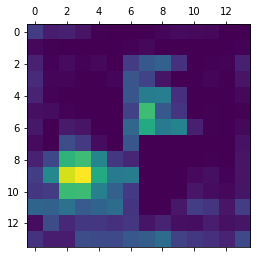

In [ ]:
heatmap=np.squeeze(heatmap)
plt.matshow(heatmap)
plt.show()

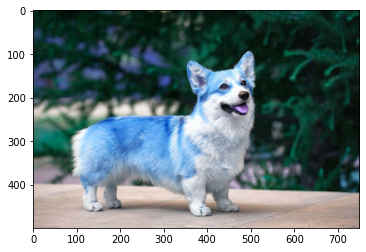

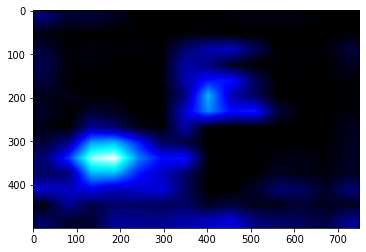

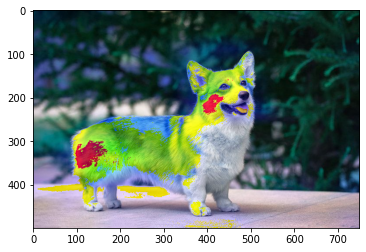

In [ ]:
img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)

heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_HOT)
plt.imshow(heatmap)
plt.show()

superimposed_img = heatmap * 0.3 + img
superimposed_img = superimposed_img.astype('uint8')

plt.imshow(superimposed_img)
plt.show()